In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv(r"E:\AIML College\Assignment Six\dataset - dataset.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [3]:
df.shape

(253680, 22)

In [4]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HeartDiseaseorAttack  253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [6]:
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [7]:
df["BMI"].value_counts()

BMI
27    24606
26    20562
24    19550
25    17146
28    16545
      ...  
85        1
91        1
86        1
90        1
78        1
Name: count, Length: 84, dtype: int64

In [10]:
df["BMI"].value_counts().sum()

253680

In [11]:
df["BMI"].unique()

array([40, 25, 28, 27, 24, 30, 34, 26, 33, 21, 23, 22, 38, 32, 37, 31, 29,
       20, 35, 45, 39, 19, 47, 18, 36, 43, 55, 49, 42, 17, 16, 41, 44, 50,
       59, 48, 52, 46, 54, 57, 53, 14, 15, 51, 58, 63, 61, 56, 74, 62, 64,
       66, 73, 85, 60, 67, 65, 70, 82, 79, 92, 68, 72, 88, 96, 13, 81, 71,
       75, 12, 77, 69, 76, 87, 89, 84, 95, 98, 91, 86, 83, 80, 90, 78],
      dtype=int64)

In [13]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [15]:
x=df.drop(['BMI'],axis=1)

In [16]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [17]:
y=df['BMI']
y.head()

0    40
1    25
2    28
3    27
4    24
Name: BMI, dtype: int64

In [18]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [19]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 253680 entries, 0 to 253679
Series name: BMI
Non-Null Count   Dtype
--------------   -----
253680 non-null  int64
dtypes: int64(1)
memory usage: 1.9 MB


In [20]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [21]:
Sex=pd.get_dummies(x['Sex'], drop_first=True)

In [22]:
x=pd.concat([x,Sex], axis=1)

In [23]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,1
0,0,1,1,1,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,False
1,0,0,0,0,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,False
2,0,1,1,1,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,False
3,0,1,0,1,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,False
4,0,1,1,1,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,False


In [24]:
Age=pd.get_dummies(x['Age'], drop_first=True)

In [25]:
Stroke=pd.get_dummies(x['Stroke'], drop_first=True)

In [26]:
Education=pd.get_dummies(x['Education'], drop_first=True)

In [27]:
x=pd.concat([x,Age,Stroke,Education], axis=1)

In [28]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,10,11,12,13,1,2,3,4,5,6
0,0,1,1,1,1,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,1,0,0,1,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,1,1,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
3,0,1,0,1,0,0,0,1,1,1,...,False,True,False,False,False,False,True,False,False,False
4,0,1,1,1,0,0,0,1,1,1,...,False,True,False,False,False,False,False,False,True,False


In [29]:
x=x.drop(['Sex', 'Age', 'Stroke', 'Education'], axis=1)

In [30]:
x.head()

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,...,10,11,12,13,1,2,3,4,5,6
0,0,1,1,1,1,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,1,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
2,0,1,1,1,0,0,0,1,0,0,...,False,False,False,False,False,False,False,True,False,False
3,0,1,0,1,0,0,1,1,1,0,...,False,True,False,False,False,False,True,False,False,False
4,0,1,1,1,0,0,1,1,1,0,...,False,True,False,False,False,False,False,False,True,False


In [31]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [34]:
age_edu = df.groupby("Age")["Education"].sum().sort_values(ascending=False).head(10).reset_index()
fig = px.bar(age_edu, x="Age", y="Education", title="Age Vs Education", color_discrete_sequence=px.colors.qualitative.Alphabet_r)
fig.show()


Text(0.5, 1.0, 'Education vs Age')

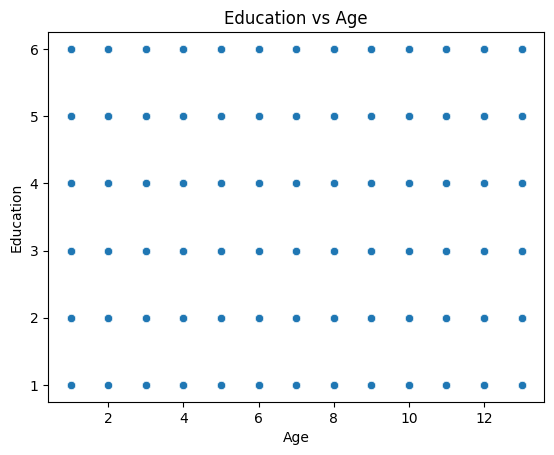

In [38]:
#Scatter Plot
sns.scatterplot(data=df, y="Education", x="Age")
plt.title("Education vs Age")

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [43]:
# regressor = LinearRegression()
# regressor.fit(x_train,y_train)
x_train.columns = x_train.columns.astype(str)
regressor.fit(x_train, y_train)


LinearRegression()

In [45]:
# y_pred = regressor.predict(x_test)
# Convert both train and test column names to string
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

# Fit and predict again
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


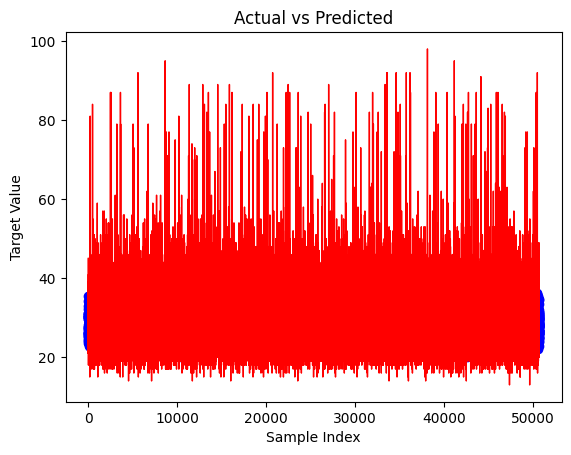

In [49]:
plt.plot(y_test.values, label='Actual', color='red', linewidth=1)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted', color='blue')

plt.title('Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.show()


In [51]:
regressor.coef_

array([ 1.30636143,  2.13777092,  0.36022697,  0.55989423, -0.55128474,
       -0.41991467, -1.08822216, -0.3992409 , -0.02977318, -1.00062354,
        0.1241611 , -0.03150388,  0.78871444, -0.00523806, -0.03742502,
        2.13713788,  0.00963913,  0.52913057,  1.66227881,  2.37032212,
        2.30733929,  2.35466034,  2.12378217,  1.65773301,  1.30811923,
        0.83520295,  0.56243183, -0.20098207, -1.08315144, -2.5701554 ,
       -1.00115066, -0.2746159 ,  0.1095384 ,  0.35411878,  0.50005343,
       -0.2674471 ])

In [52]:
regressor.intercept_

24.341307521546156